# Assignment: Exploratory Data Analysis
### `! git clone https://github.com/ds3001f25/eda_assignment.git`
### Do Q1, Q2, and Q3.

**Q1.** In class, we talked about how to compute the sample mean of a variable $X$,
$$
m(X) = \dfrac{1}{N} \sum_{i=1}^N x_i
$$
and sample covariance of two variables $X$ and $Y$,
$$
\text{cov}(X,Y) = \dfrac{1}{N} \sum_{i=1}^N (x_i - m(X))(y_i - m(Y))).
$$
Recall, the sample variance of $X$ is
$$
s^2 = \dfrac{1}{N} \sum_{i=1}^N (x_i - m(X))^2.
$$
It can be very helpful to understand some basic properties of these statistics. If you want to write your calculations on a piece of paper, take a photo, and upload that to your GitHub repo, that's probably easiest.

1. Show that $m(a + bX) = a+b \times m(X)$.
2. Show that $\text{cov}(X,a+bY) = b \times \text{cov}(X,Y)$
3. Show that $\text{cov}(a+bX,a+bX) = b^2 \text{cov}(X,X) $, and in particular that $\text{cov}(X,X) = s^2 $.
4. Instead of the mean, consider the median. Consider transformations that are non-decreasing (if $x\ge x'$, then $g(x)\ge g(x')$), like $2+5 \times X$ or $\text{arcsinh}(X)$. Is a non-decreasing transformation of the median the median of the transformed variable? Explain. Does your answer apply to any quantile? The IQR? The range?
5. Consider a non-decreasing transformation $g()$. Is is always true that $m(g(X))= g(m(X))$?

Uploaded
https://github.com/JingzhiYang04/eda_assignment/blob/main/eda_assignment_q1.pdf

**Q2.** This question uses the Airbnb data to practice making visualizations.

  1. Load the `./data/airbnb_hw.csv` data with Pandas. This provides a dataset of AirBnB rental properties for New York City.  
  2. What are are the dimensions of the data? How many observations are there? What are the variables included? Use `.head()` to examine the first few rows of data.
  3. Cross tabulate `Room Type` and `Property Type`. What patterns do you see in what kinds of rentals are available? For which kinds of properties are private rooms more common than renting the entire property?
  4. For `Price`, make a histogram, kernel density, box plot, and a statistical description of the variable. Are the data badly scaled? Are there many outliers? Use `log` to transform price into a new variable, `price_log`, and take these steps again.
  5. Make a scatterplot of `price_log` and `Beds`. Describe what you see. Use `.groupby()` to compute a desciption of `Price` conditional on/grouped by the number of beds. Describe any patterns you see in the average price and standard deviation in prices.
  6. Make a scatterplot of `price_log` and `Beds`, but color the graph by `Room Type` and `Property Type`. What patterns do you see? Compute a description of `Price` conditional on `Room Type` and `Property Type`. Which Room Type and Property Type have the highest prices on average? Which have the highest standard deviation? Does the mean or median appear to be a more reliable estimate of central tendency, and explain why?

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 1. Load data
airbnb = pd.read_csv("/airbnb_hw.csv")

In [ ]:
# 2. Dimensions of data
print("\n=== Dimensions & Columns ===")
print(f"Shape (rows, cols): {airbnb.shape}")
print("Columns:", list(airbnb.columns))
print("\nHead():")
print(airbnb.head())


=== Dimensions & Columns ===
Shape (rows, cols): (30478, 13)
Columns: ['Host Id', 'Host Since', 'Name', 'Neighbourhood ', 'Property Type', 'Review Scores Rating (bin)', 'Room Type', 'Zipcode', 'Beds', 'Number of Records', 'Number Of Reviews', 'Price', 'Review Scores Rating']

Head():
    Host Id Host Since                                Name Neighbourhood   \
0   5162530        NaN     1 Bedroom in Prime Williamsburg       Brooklyn   
1  33134899        NaN     Sunny, Private room in Bushwick       Brooklyn   
2  39608626        NaN                Sunny Room in Harlem      Manhattan   
3       500  6/26/2008  Gorgeous 1 BR with Private Balcony      Manhattan   
4       500  6/26/2008            Trendy Times Square Loft      Manhattan   

  Property Type  Review Scores Rating (bin)        Room Type  Zipcode  Beds  \
0     Apartment                         NaN  Entire home/apt  11249.0   1.0   
1     Apartment                         NaN     Private room  11206.0   1.0   
2     Apartmen

The dataset has 30,478 rows and 13 columns (30,478 observations). Variables are Host Id, Host Since, Name, Neighbourhood , Property Type, Review Scores Rating (bin), Room Type, Zipcode, Beds, Number of Records, Number Of Reviews, Price, and Review Scores Rating.

In [ ]:
# 3. Cross tabulate Room Type and Property Type
print("\n=== Crosstab: Room Type x Property Type (counts) ===")
xtab = pd.crosstab(airbnb['Room Type'], airbnb['Property Type'], dropna=False)
print(xtab)


=== Crosstab: Room Type x Property Type (counts) ===
Property Type    Apartment  Bed & Breakfast  Boat  Bungalow  Cabin  Camper/RV  \
Room Type                                                                       
Entire home/apt      15669               13     7         4      1          6   
Private room         10748              155     1         0      1          1   
Shared room            685               12     0         0      0          0   

Property Type    Castle  Chalet  Condominium  Dorm  House  Hut  Lighthouse  \
Room Type                                                                    
Entire home/apt       0       0           72     4    752    0           1   
Private room          1       1           22    16   1258    2           0   
Shared room           0       0            0    11     80    0           0   

Property Type    Loft  Other  Tent  Townhouse  Treehouse  Villa  NaN  
Room Type                                                             
Entire 

Apartments dominate across room types; shared rooms are rare. Private rooms are more common than entire-property rentals in Bed & Breakfast, Dorm, House, Hut, Castle, Chalet, Tent, Treehouse, and Other.


=== Price: Statistical Description ===
count    30297.000000
mean       153.357032
std        108.895698
min         10.000000
5%          50.000000
25%         80.000000
50%        125.000000
75%        192.000000
95%        350.000000
max        999.000000
Name: Price, dtype: float64
IQR bounds: [-88.00, 360.00] | # outliers: 1347


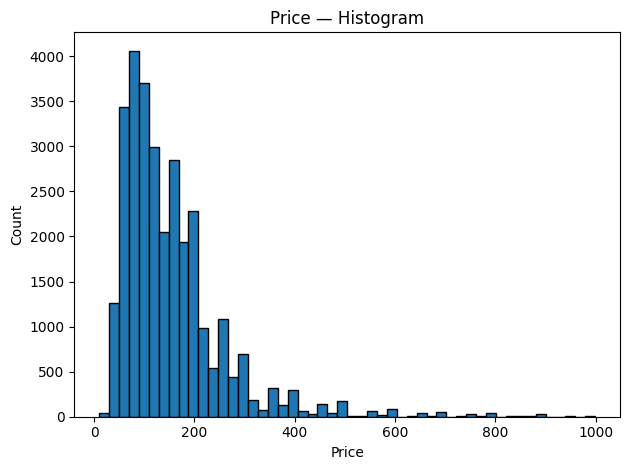

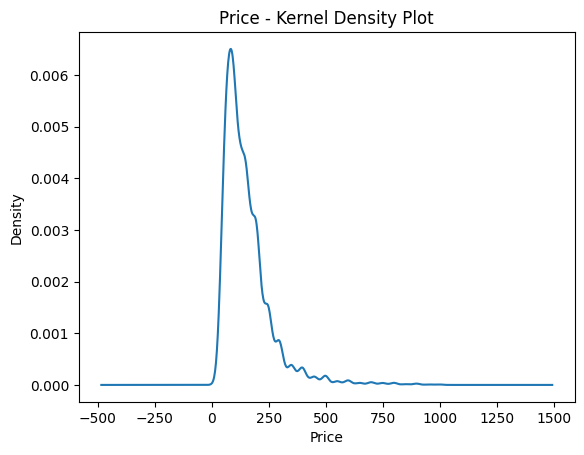


Statistical description of price_log:
count    30297.000000
mean         4.845370
std          0.596999
min          2.302585
25%          4.382027
50%          4.828314
75%          5.257495
max          6.906755
Name: price_log, dtype: float64


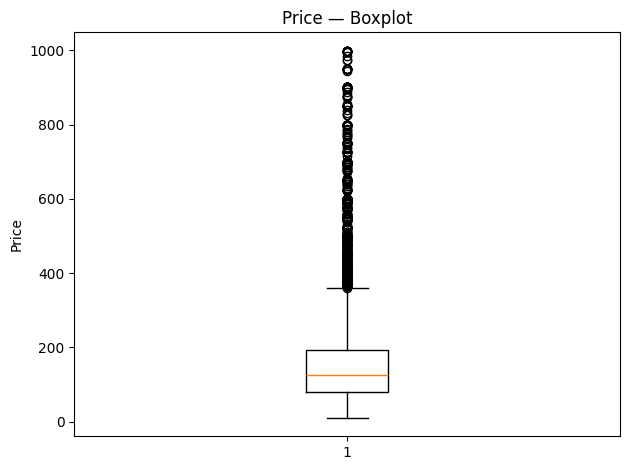

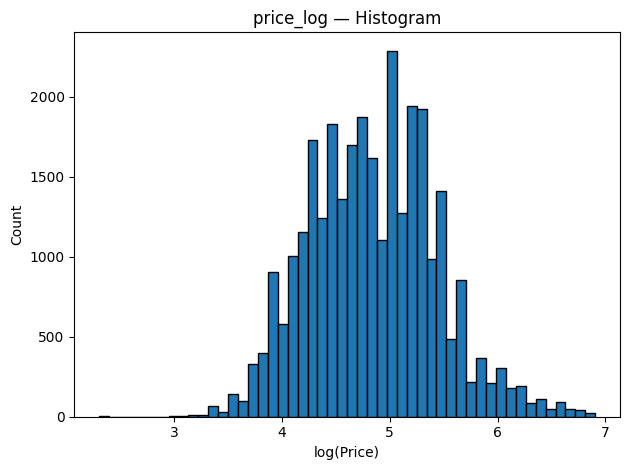

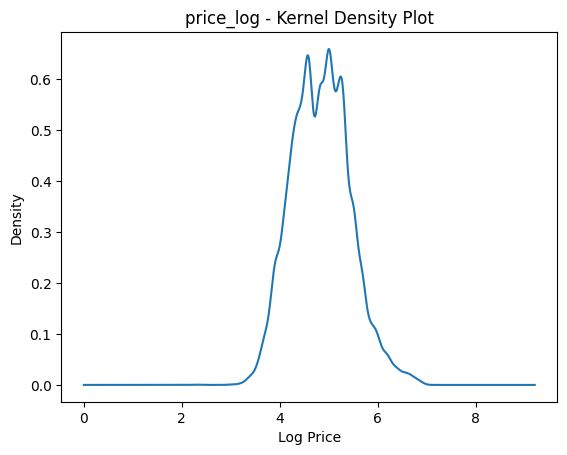

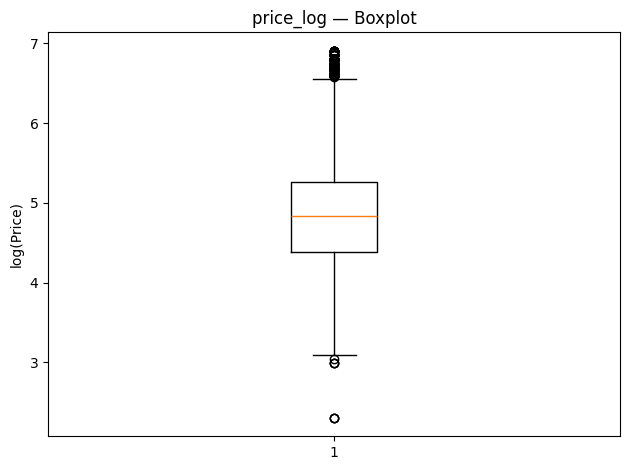

In [ ]:
# 4. Price: histogram, KDE, boxplot, stats
price = pd.to_numeric(airbnb['Price'], errors="coerce")

print("\n=== Price: Statistical Description ===")
desc = price.describe(percentiles=[0.05, 0.25, 0.5, 0.75, 0.95])
print(desc)

# Outliers via 1.5*IQR rule
q1, q3 = desc["25%"], desc["75%"]
iqr = q3 - q1
lower, upper = q1 - 1.5 * iqr, q3 + 1.5 * iqr
n_outliers = ((price < lower) | (price > upper)).sum()
print(f"IQR bounds: [{lower:.2f}, {upper:.2f}] | # outliers: {int(n_outliers)}")

# Histogram
plt.figure()
price.plot(kind="hist", bins=50, edgecolor='black', density=False)
plt.title("Price — Histogram")
plt.xlabel("Price")
plt.ylabel("Count")
plt.tight_layout()

# KDE
plt.figure()
price.plot(kind='density')
plt.title('Price - Kernel Density Plot')
plt.xlabel('Price')
plt.show()

# Boxplot
plt.figure()
plt.boxplot(price.dropna(), vert=True)
plt.title("Price — Boxplot")
plt.ylabel("Price")
plt.tight_layout()

# Log transform
PRICE_COL = 'Price'
airbnb_pos = airbnb.copy()
airbnb_pos[PRICE_COL] = pd.to_numeric(airbnb_pos[PRICE_COL], errors="coerce")
airbnb_pos = airbnb_pos[airbnb_pos[PRICE_COL] > 0].copy()
airbnb_pos['price_log'] = np.log(airbnb_pos[PRICE_COL])  # Adding 1 to avoid log(0)

print("\nStatistical description of price_log:")
print(airbnb_pos['price_log'].describe())

# Histogram for price_log
plt.figure()
airbnb_pos["price_log"].plot(kind="hist", edgecolor='black', bins=50)
plt.title("price_log — Histogram")
plt.xlabel("log(Price)")
plt.ylabel("Count")
plt.tight_layout()

# KDE for price_log
plt.figure()
airbnb_pos['price_log'].plot(kind='density')
plt.title('price_log - Kernel Density Plot')
plt.xlabel('Log Price')
plt.show()

# Boxplot for price_log
plt.figure()
plt.boxplot(airbnb_pos["price_log"].dropna(), vert=True)
plt.title("price_log — Boxplot")
plt.ylabel("log(Price)")
plt.tight_layout()

The raw scale is poor because price is heavily right-skewed with a long upper tail, mean is higher than median, and the boxplot shows many high-price outliers. After the log transform, price_log is roughly bell-shaped with far fewer outliers.


=== Price by Beds (groupby) ===
      count        mean         std  median    min    max
Beds                                                     
0.0       2   92.000000   38.183766    92.0   65.0  119.0
1.0   20307  124.757670   75.685752   100.0   10.0  950.0
2.0    6561  186.702332  115.044205   160.0   25.0  999.0
3.0    2029  234.928043  142.288189   200.0   26.0  999.0
4.0     766  280.554830  175.512312   240.0   27.0  999.0
5.0     274  322.000000  190.319415   285.0   35.0  995.0
6.0     166  316.313253  201.157585   271.0   35.0  900.0
7.0      45  341.377778  220.116631   300.0   55.0  900.0
8.0      20  331.850000  155.652202   339.5   55.0  750.0
9.0      14  587.142857  208.351721   625.0  175.0  900.0
10.0     15  442.200000  263.926992   400.0   95.0  975.0
11.0      4  332.250000  236.798613   289.5  100.0  650.0
12.0      3  225.000000   75.000000   225.0  150.0  300.0
16.0      8  402.250000  235.093143   350.0  104.0  750.0


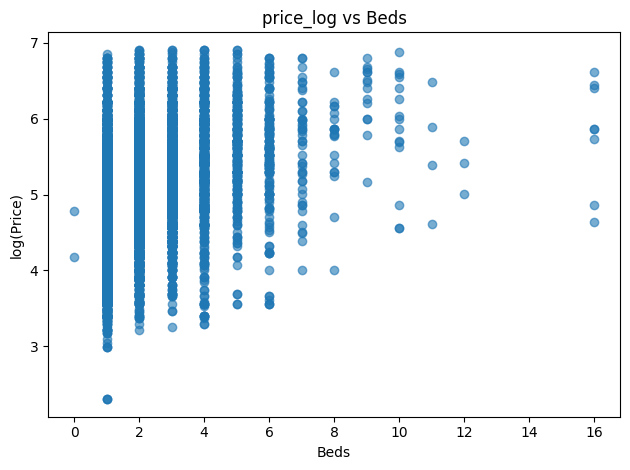

In [ ]:
# 5. Scatterplot of price_log and Beds and Price by Beds (groupby)
beds = pd.to_numeric(airbnb_pos['Beds'], errors="coerce")

plt.figure()
plt.scatter(beds, airbnb_pos["price_log"], alpha=0.6)
plt.title("price_log vs Beds")
plt.xlabel("Beds")
plt.ylabel("log(Price)")
plt.tight_layout()

print("\n=== Price by Beds (groupby) ===")
by_beds = (
    airbnb_pos.assign(**{PRICE_COL: price})
      .dropna(subset=[PRICE_COL, 'Beds'])
      .groupby('Beds')[PRICE_COL]
      .agg(["count", "mean", "std", "median", "min", "max"])
      .sort_index()
)
print(by_beds)

Price_log rise modestly with more beds. Mean price generally rises with beds. Standard deviation also grows, indicating much greater price dispersion for larger properties.

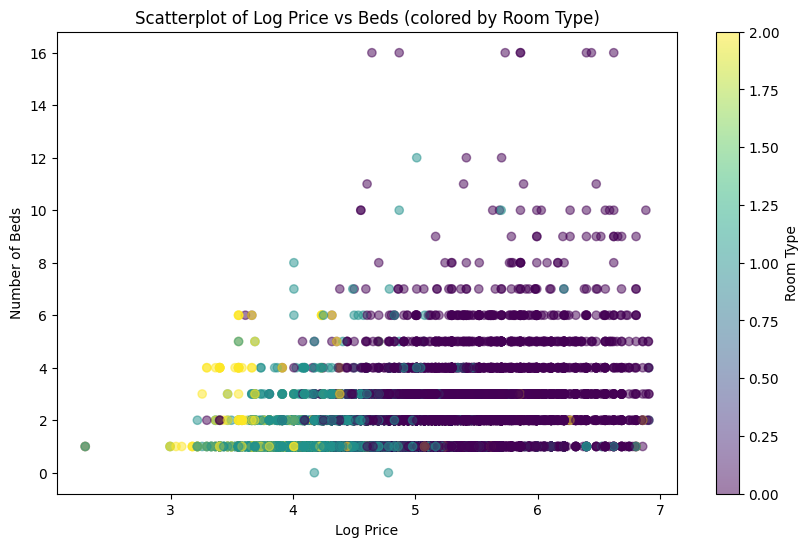


Price conditional on Room Type and Property Type:
                                       mean         std  median
Room Type       Property Type                                  
Entire home/apt Apartment        200.210161  109.967435   175.0
                Bed & Breakfast  184.538462  119.814172   130.0
                Boat             158.428571   51.110524   150.0
                Bungalow         150.750000   46.464144   160.5
                Camper/RV        114.333333  107.685963    74.0
                Condominium      281.126761  175.313998   200.0
                Dorm              44.250000   24.060687    33.5
                House            234.554633  159.785974   188.0
                Loft             284.910290  184.515517   220.0
                Other            290.800000  273.526273   177.5
                Townhouse        242.037037  166.755243   189.0
                Villa            206.333333   89.667906   200.0
Private room    Apartment         91.605903   46.3561

In [ ]:
# 6. Price_log vs Beds, colored by Room Type and Property Type and conditional description
plt.figure(figsize=(10, 6))
scatter = plt.scatter(airbnb_pos['price_log'], airbnb_pos['Beds'], c=airbnb_pos['Room Type'].astype('category').cat.codes, cmap='viridis', alpha=0.5)
plt.colorbar(scatter, label='Room Type')
plt.title('Scatterplot of Log Price vs Beds (colored by Room Type)')
plt.xlabel('Log Price')
plt.ylabel('Number of Beds')
plt.show()

# Groupby Room Type and Property Type
price_by_room_prop = airbnb_pos.groupby(['Room Type', 'Property Type'])['Price'].agg(['mean', 'std', 'median']).dropna()
print("\nPrice conditional on Room Type and Property Type:")
print(price_by_room_prop)

Entire homes cost more and increase with beds; private/shared rooms cluster lower, and Lofts/Condos/Townhouses skew higher. The highest average and variability are Entire home/apt – Other; prices are right-skewed with outliers, so the median is more reliable than the mean.

**Q3.** This question looks at a time series of the number of active oil drilling rigs in the United States over time. The data comes from the Energy Information Agency.

1. Load `./data/drilling_rigs.csv` and examine the data. How many observations? How many variables? Are numeric variables correctly read in by Pandas, or will some variables have to be typecast/coerced? Explain clearly how these data need to be cleaned.
2. To convert the `Month` variable to an ordered datetime variable, use `df['time'] = pd.to_datetime(df['Month'], format='mixed')`.
3. Let's look at `Active Well Service Rig Count (Number of Rigs)`, which is the total number of rigs over time. Make a line plot of this time series. Describe what you see.
4. Instead of levels, we want to look at change over time. Compute the first difference of  `Active Well Service Rig Count (Number of Rigs)` and plot it over time. Describe what you see.
5. The first two columns are the number of onshore and offshore rigs, respectively. Melt these columns and plot the resulting series.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

# 1. Load and clean data
drilling_rigs = pd.read_csv("/drilling_rigs.csv")

print("=== Raw shape ===", df.shape)
print("\nColumn dtypes BEFORE cleaning:\n", df.dtypes)

=== Raw shape === (623, 12)

Column dtypes BEFORE cleaning:
 Month                                                                                                  object
Crude Oil and Natural Gas Rotary Rigs in Operation, Onshore (Number of Rigs)                            int64
Crude Oil and Natural Gas Rotary Rigs in Operation, Offshore (Number of Rigs)                           int64
Crude Oil Rotary Rigs in Operation, Total (Number of Rigs)                                            float64
Natural Gas Rotary Rigs in Operation, Total (Number of Rigs)                                          float64
Crude Oil and Natural Gas Rotary Rigs in Operation, Horizontal Trajectory (Number of Rigs)            float64
Crude Oil and Natural Gas Rotary Rigs in Operation, Directional Trajectory (Number of Rigs)           float64
Crude Oil and Natural Gas Rotary Rigs in Operation, Vertical Trajectory (Number of Rigs)              float64
Crude Oil and Natural Gas Rotary Rigs in Operation, Total (

623 observations and 10 variables. Several numeric fields were read as object, so coerce non-date columns to numeric. Month to datetime and sort by time, then handle the resulting NaNs.

In [ ]:
# 2. Convert Month to ordered datetime & sort
df['time'] = pd.to_datetime(df['Month'], format='mixed')

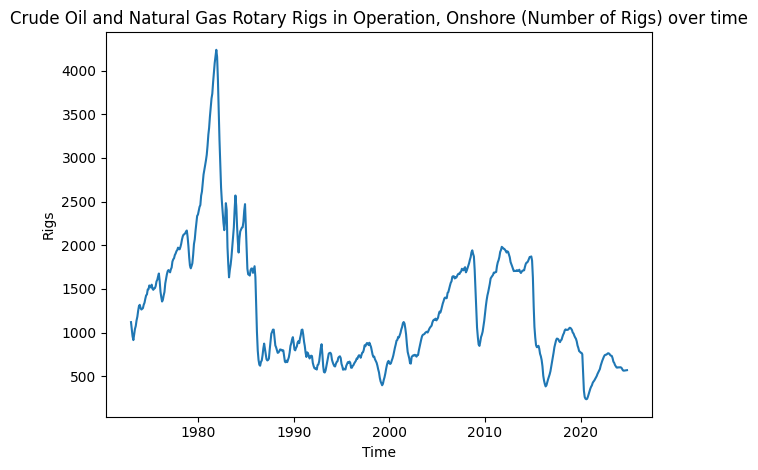

In [ ]:
# 3. Line plot of total rigs over time
plt.figure()
plt.plot(df["time"], df[total_col])
plt.title(f"{total_col} over time")
plt.xlabel("Time")
plt.ylabel("Rigs")
plt.tight_layout()

Rigs hit a big peak in the early 1980s, fell through the 1990s, bounced in the 2000s–2010s, crashed in 2015–16 and 2020, then rose a bit and leveled off below past highs.

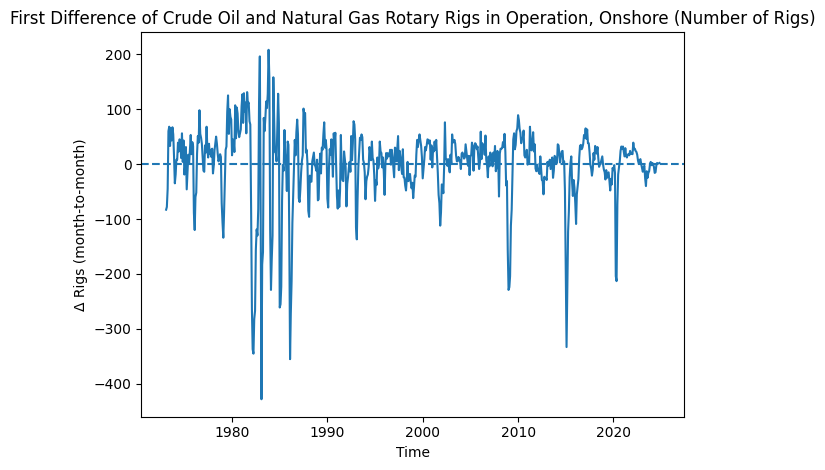

In [ ]:
# 4. Change over time
df["diff_total"] = df[total_col].diff()

plt.figure()
plt.plot(df["time"], df["diff_total"])
plt.axhline(0, linestyle="--")
plt.title(f"First Difference of {total_col}")
plt.xlabel("Time")
plt.ylabel("Δ Rigs (month-to-month)")
plt.tight_layout()

The month-to-month change wiggles around zero, with a few very large drops during downturns and some occasional big jumps.


Onshore column:  Crude Oil and Natural Gas Rotary Rigs in Operation, Onshore (Number of Rigs)
Offshore column: Crude Oil and Natural Gas Rotary Rigs in Operation, Offshore (Number of Rigs)


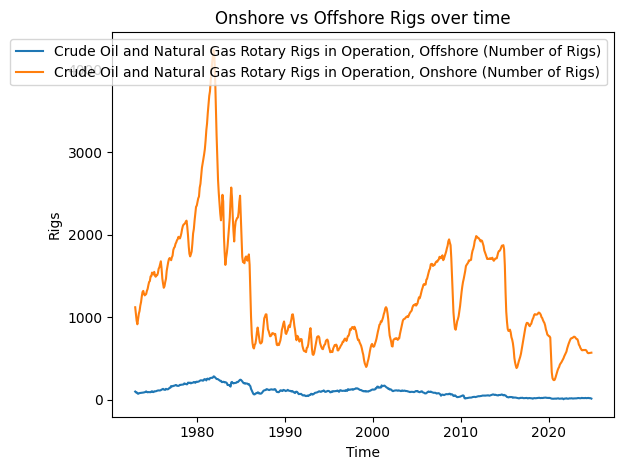

In [ ]:
# 5. Melt and plot Onshore VS. Offshore
onshore_col = find_col(["onshore"])
offshore_col = find_col(["offshore"])

if onshore_col is None or offshore_col is None:
    numeric_cols = [c for c in df.columns if c not in {date_col, "time"} and pd.api.types.is_numeric_dtype(df[c])]
    # keep the first two numeric columns as a fallback
    if len(numeric_cols) < 2:
        raise ValueError("Need at least two numeric columns for onshore/offshore.")
    onshore_col = numeric_cols[0] if onshore_col is None else onshore_col
    offshore_col = numeric_cols[1] if offshore_col is None else offshore_col

print(f"\nOnshore column:  {onshore_col}")
print(f"Offshore column: {offshore_col}")

melt_df = (
    df[["time", onshore_col, offshore_col]]
    .melt(id_vars="time", var_name="Rig Type", value_name="Rigs")
    .dropna(subset=["Rigs"])
)

plt.figure()
for rig_type, sub in melt_df.groupby("Rig Type"):
    plt.plot(sub["time"], sub["Rigs"], label=str(rig_type))
plt.title("Onshore vs Offshore Rigs over time")
plt.xlabel("Time")
plt.ylabel("Rigs")
plt.legend()
plt.tight_layout()